# 첫 번째 신경망 훈련하기: 기초적인 분류 문제
* 운동화나 셔츠 같은 옷 이미지를 분류하는 신경망 모델을 훈련합니다.

## 패션 MNIST 데이터셋 임포트하기
* 패션 MNIST: 10개의 범주(category)와 70,000개의 흑백 이미지로 구성
* 이미지 해상도(28x28 픽셀)

In [1]:
# tensorflow, keras
import tensorflow as tf
from tensorflow import keras
# helper library
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [2]:
# load dataset
fasion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fasion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
# 나중에 이미지를 출력할 때 사용하기 위해 클래스 이름을 변수에 저장
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 데이터 탐색

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

# 데이터 전처리

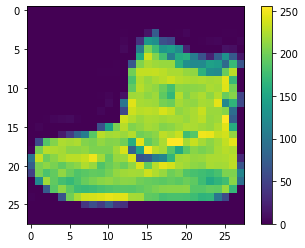

In [9]:
# 첫 번째 train image를 시각화하여 확인
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
# 값의 범위를 0~1로 정규화
train_images = train_images / 255.0
test_images = test_images / 255.0

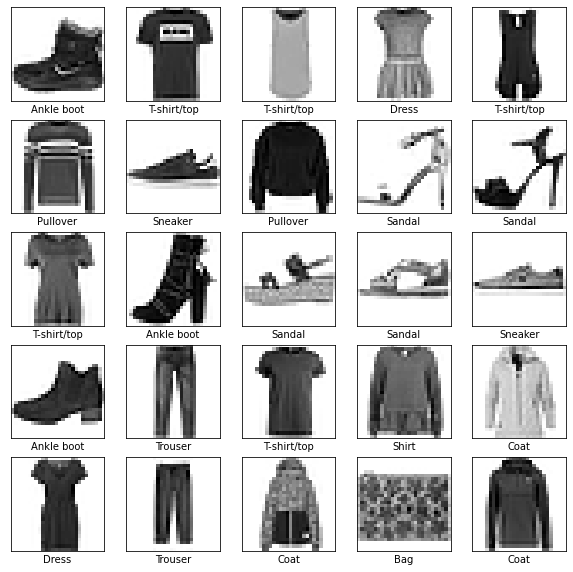

In [11]:
# train image, label 시각화
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 모델 구성
* 신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일함

## 층 설정
* 신경망의 기본 구성 요소는 층(layer)
* 층은 주입된 데이터에서 표현을 추출함

In [12]:
# 레이어 설정
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

1. **tf.keras.layers.Flatten**은 2차원 배열의 이미지 포맷을 28*28=784 픽셀의 1차원 배열로 변환. 이 층은 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘립니다. 이 층에는 가중치가 없고 데이터를 변환함
2. 픽셀을 펼친 후 두 개의 **tf.keras.layers.Dense** 층이 연속되어 연결됨. 이 층을 밀접 연결(densely-connected) 또는 완전 연결(fully-connected) 층이라 부름. 첫 번째 Dense는 128개의 노드를 가짐. 두 번째 층은 10개 노드를 가짐. 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1. 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 출력함

# 모델 컴파일

* 손실 함수(Loss function): 훈련하는 동안 모델의 오차를 측정. 이 함수를 최소화 해야 함.
* 옵티마이저(optimizer): 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정함
* 지표(Metrics): 훈련 단계와 테스트 단계를 모니터링하기 위해 사용함

In [13]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 모델 훈련

신경망 모델 훈련 단계

1. 훈련 데이터 모델에 주입 - train_images, train_labels
2. 모델이 이미지와 레이블을 매핑하는 방법을 배움
3. 테스트 세트에 대한 모델의 예측을 만듦 - test_images 이 예측이 test_labels 배열의 레이블과 맞는지 확인

-> 훈련을 시작하기 위해 model.fit 메서드 호출하면 모델이 훈련 데이터를 학습함

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6382 - accuracy: 0.7768
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3809 - accuracy: 0.8618
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3402 - accuracy: 0.8757
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3167 - accuracy: 0.8837
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2943 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2813 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2700 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2506 - accuracy: 0.9073
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2469 - accuracy: 0.9058
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.234

# 정확도 평가

In [34]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy: ', test_acc)

313/313 - 0s - loss: 0.3400 - accuracy: 0.8807

Test accuracy:  0.8806999921798706


# 예측 만들기

## 예측값 확인

In [16]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

In [19]:
predictions[0] # 첫 번째 test image에 대한 예측값

array([1.5789603e-07, 7.6817927e-11, 2.2106585e-09, 1.2202809e-12,
       1.4711603e-11, 6.6590547e-03, 1.4886917e-08, 1.9720786e-03,
       8.2265741e-09, 9.9136871e-01], dtype=float32)

In [20]:
sum(predictions[0]) # 위 예측값은 각 label에 대한 확률분포임(합이 1)

1.0000000275492236

In [21]:
np.argmax(predictions[0]) # 확률이 가장 높은 값의 label

9

In [22]:
test_labels[0] # 실제 label

9

## 예측 결과 시각화

In [23]:
# image, label 시각화 함수
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    # 이미지 출력
    plt.imshow(img, cmap=plt.cm.binary)
    # 예측 레이블 색 설정(맞으면 파란색, 틀리면 빨간색)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    # 예측 레이블, 확률, 실제 레이블 출력
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)

# 예측값 시각화 함수
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    # 막대 그래프로 예측값 시각화
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    # 막대 색 설정(맞으면 파란색, 틀리면 빨간색)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

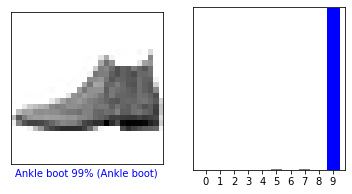

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

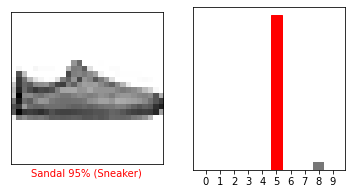

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

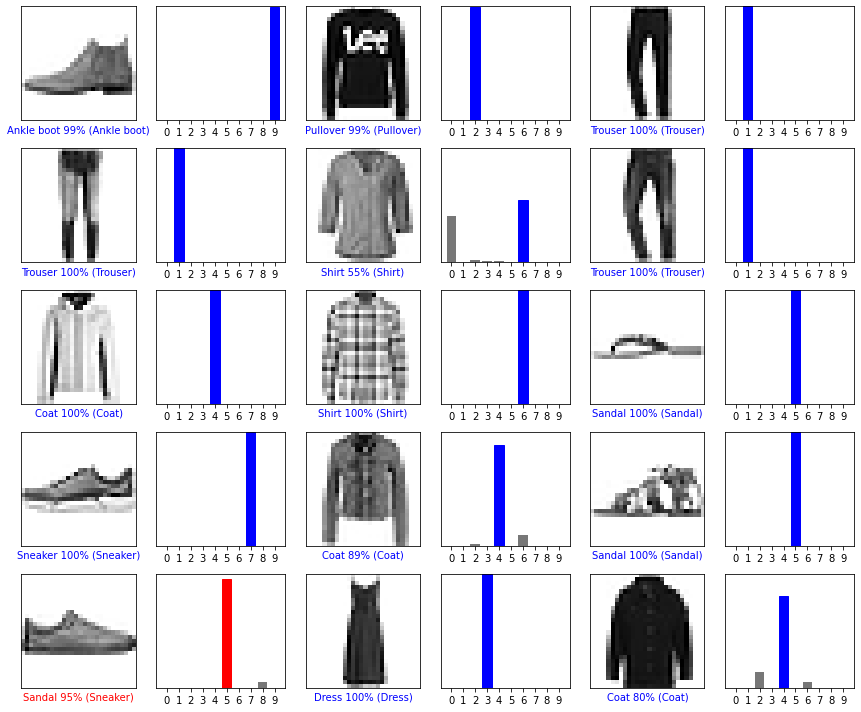

In [26]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# trained model 사용

In [27]:
# 테스트 이미지 하나 선택
img = test_images[1]
print(img.shape)

(28, 28)


In [28]:
# 이미지를 배치로 만들기
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [29]:
# 훈련된 모델에 이미지를 넣고 예측
predictions_single = probability_model.predict(img)
print(predictions_single)

[[8.72039003e-04 1.70414152e-13 9.91590202e-01 2.66355471e-09
  5.58442250e-03 2.48032652e-08 1.95334549e-03 1.41541476e-14
  4.23695495e-10 1.37595556e-13]]


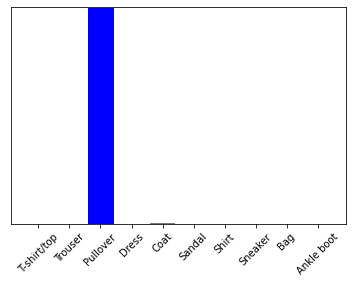

In [30]:
# 예측값 시각화
plot_value_array(1, predictions_single[0], test_labels)
_ =plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [31]:
# 예측된 label
np.argmax(predictions_single[0])

2